In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path


import seaborn as sns



In [42]:
def correlation_sum(corr_mat):
    assert corr_mat.shape[0] == corr_mat.shape[1]
    corr_mat_abs = np.absolute(corr_mat)
    sums = np.sum(corr_mat_abs, axis=1) - corr_mat_abs.diagonal() # axis doen't matter
    sums /= (corr_mat.shape[0]-1)
    return sums

In [43]:
# find all folders in the 'correlation_analysis' folder
# for every folder we extract the path, the model name, the wandb run id and the number and end up creating a dataframe
all_folders = glob.glob('correlation_analysis/*')

all_data = pd.DataFrame(columns=['path', 'model_name', 'dataset_name', 'data_split', 'wandb_run_id', 'num', 'corr_sum'])



for folder in all_folders:
    path = Path(folder)
    model_name = path.name
    model_name = model_name.split('-')[0]
    dataset_name = path.name.split('-')[1].split('_')[0]
    data_split = path.name.split('_')[-1]
    wandb_run_id = path.name.split('_')[-2]
    
    # print(path, model_name, dataset_name, data_split, wandb_run_id)
    all_data.loc[len(all_data)] = [path, model_name, dataset_name, data_split, wandb_run_id, 0, 0]
        
all_data   

,path,model_name,dataset_name,data_split,wandb_run_id,num,corr_sum
0,correlation_analysis/vicreg-imagenet100_pxqwg3...,vicreg,imagenet100,train,pxqwg3ex,0,0
1,correlation_analysis/vicreg-imagenet100_pxqwg3...,vicreg,imagenet100,val,pxqwg3ex,0,0
2,correlation_analysis/vicreg-cifar100_000hudwm_...,vicreg,cifar100,train,000hudwm,0,0
3,correlation_analysis/vicreg-cifar100_000hudwm_val,vicreg,cifar100,val,000hudwm,0,0
4,correlation_analysis/vicreg-cifar100_31yfnww4_...,vicreg,cifar100,train,31yfnww4,0,0
...,...,...,...,...,...,...,...
119,correlation_analysis/simclr-cifar100_3kh01qs8_val,simclr,cifar100,val,3kh01qs8,0,0
120,correlation_analysis/simclr-cifar10_y6674tsl_t...,simclr,cifar10,train,y6674tsl,0,0
121,correlation_analysis/simclr-cifar10_y6674tsl_val,simclr,cifar10,val,y6674tsl,0,0
122,correlation_analysis/simclr-cifar100_5dgztcwi_...,simclr,cifar100,train,5dgztcwi,0,0


In [53]:
# for every entry in the dataframe we load the dataframe and calculate the correlation sum
for index, row in all_data.iterrows():
    final_path = row['path']/Path('correlation.csv')
    print(final_path)
    df = pd.read_csv(final_path)

    corr_mat = df.to_numpy()
    corr_sum = np.average(corr_mat)
    all_data.loc[index, 'corr_sum'] = corr_sum
    all_data.loc[index, 'num'] = corr_mat.shape[0]

# barlow_train = pd.read_csv('../cifar10_-home-david-Downloads-dye9qi27_train_corr.csv',header=None)
# barlow_val = pd.read_csv('../cifar10_-home-david-Downloads-dye9qi27_val_corr.csv',header=None)

# lin_pred_min_train = pd.read_csv('../cifar10_-home-david-Downloads-gqvmpfko_train_corr.csv',header=None)
# lin_pred_min_val = pd.read_csv('../cifar10_-home-david-Downloads-gqvmpfko_val_corr.csv',header=None)



correlation_analysis/vicreg-imagenet100_pxqwg3ex_train/correlation.csv
correlation_analysis/vicreg-imagenet100_pxqwg3ex_val/correlation.csv
correlation_analysis/vicreg-cifar100_000hudwm_train/correlation.csv
correlation_analysis/vicreg-cifar100_000hudwm_val/correlation.csv
correlation_analysis/vicreg-cifar100_31yfnww4_train/correlation.csv
correlation_analysis/vicreg-cifar100_31yfnww4_val/correlation.csv
correlation_analysis/vicreg-imagenet100_ihgpptnq_train/correlation.csv
correlation_analysis/vicreg-imagenet100_ihgpptnq_val/correlation.csv
correlation_analysis/vicreg-cifar10_ko7v7xmw_train/correlation.csv
correlation_analysis/vicreg-cifar10_ko7v7xmw_val/correlation.csv
correlation_analysis/vicreg-cifar10_oapd6xab_train/correlation.csv
correlation_analysis/vicreg-cifar10_oapd6xab_val/correlation.csv
correlation_analysis/cl_lin_pred_min-imagenet100_4450okxr_train/correlation.csv
correlation_analysis/cl_lin_pred_min-imagenet100_4450okxr_val/correlation.csv
correlation_analysis/cl_lin_pr

/home/david/.local/share/virtualenvs/Self-Supervised-Learning-with-Predictabili-RPXJKYD0/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/david/.local/share/virtualenvs/Self-Supervised-Learning-with-Predictabili-RPXJKYD0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/david/.local/share/virtualenvs/Self-Supervised-Learning-with-Predictabili-RPXJKYD0/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/david/.local/share/virtualenvs/Self-Supervised-Learning-with-Predictabili-RPXJKYD0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/home/david/.local/share/virtualenvs/Self-Supervised-Learning-with-Predictabili-RPXJKYD0/lib/p

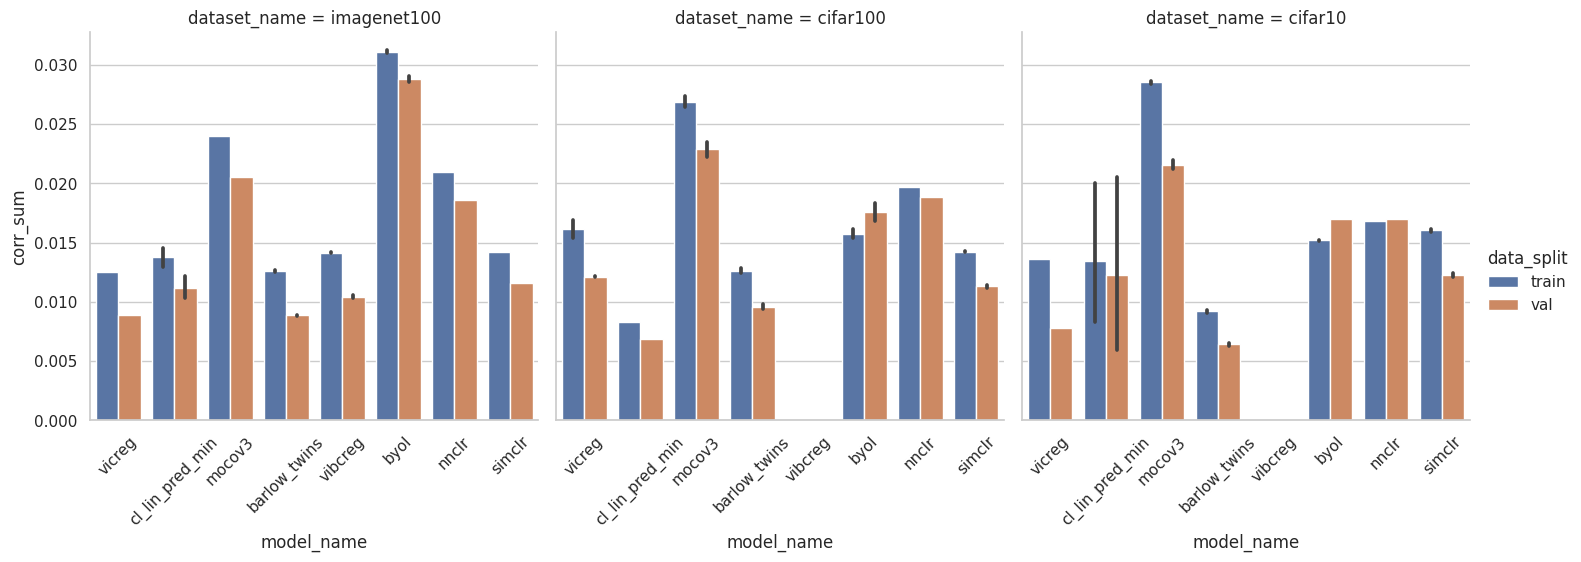

In [45]:
# 


# for dataset in all_data['dataset_name'].unique():
#     df = all_data[all_data['dataset_name'] == dataset]
#     df = df.sort_values(by=['model_name'])
#     plt.figure(figsize=(20,10))
#     ax = sns.barplot(x="model_name", y="corr_sum", data=df)
#     ax.set_title(dataset)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#     plt.show()
sns.set_theme(style="whitegrid")
g = sns.catplot(x="model_name", y="corr_sum", col="dataset_name", hue="data_split",data=all_data, kind="bar")
# make x-axis labels vertical
g.set_xticklabels(rotation=45)

In [51]:
all_data[all_data['model_name'] == 'vibcreg']['path']

84    correlation_analysis/vibcreg-cifar100_3ih3ejt3...
85    correlation_analysis/vibcreg-cifar100_3ih3ejt3...
86    correlation_analysis/vibcreg-cifar10_4zre6v8l_...
87    correlation_analysis/vibcreg-cifar10_4zre6v8l_val
88    correlation_analysis/vibcreg-imagenet100_hbjjm...
89    correlation_analysis/vibcreg-imagenet100_hbjjm...
90    correlation_analysis/vibcreg-imagenet100_9tjxi...
91    correlation_analysis/vibcreg-imagenet100_9tjxi...
92    correlation_analysis/vibcreg-cifar100_6lxrq5la...
93    correlation_analysis/vibcreg-cifar100_6lxrq5la...
94    correlation_analysis/vibcreg-cifar10_t4i239rs_...
95    correlation_analysis/vibcreg-cifar10_t4i239rs_val
Name: path, dtype: object